<a href="https://colab.research.google.com/github/jd-gebbia/Applied_Analytics/blob/main/AAPM_Case_Study_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving nyc-bicycle-counts.csv to nyc-bicycle-counts (1).csv


In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
nyc = pd.read_csv('nyc-bicycle-counts.csv')

In [3]:
nyc.head()

,Index,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,4/1/2016 0:00,4/1/2016 0:00,78.1,66.0,0.01,1704,3126,4115,2552,11497
1,1,4/2/2016 0:00,4/2/2016 0:00,55.0,48.9,0.15,827,1646,2565,1884,6922
2,2,4/3/2016 0:00,4/3/2016 0:00,39.9,34.0,0.09,526,1232,1695,1306,4759
3,3,4/4/2016 0:00,4/4/2016 0:00,44.1,33.1,0.47 (S),521,1067,1440,1307,4335
4,4,4/5/2016 0:00,4/5/2016 0:00,42.1,26.1,0,1416,2617,3081,2357,9471


In [4]:
sum(nyc.Date != nyc.Day)

0

In [5]:
# Remove duplicate rows and columns
nyc = nyc.iloc[:,1:].drop_duplicates()
nyc = nyc.drop(['Day'], axis=1)
nyc.head()

,Date,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,4/1/2016 0:00,78.1,66.0,0.01,1704,3126,4115,2552,11497
1,4/2/2016 0:00,55.0,48.9,0.15,827,1646,2565,1884,6922
2,4/3/2016 0:00,39.9,34.0,0.09,526,1232,1695,1306,4759
3,4/4/2016 0:00,44.1,33.1,0.47 (S),521,1067,1440,1307,4335
4,4/5/2016 0:00,42.1,26.1,0,1416,2617,3081,2357,9471


In [6]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 30 non-null     object 
 1   High Temp (°F)       30 non-null     float64
 2   Low Temp (°F)        30 non-null     float64
 3   Precipitation        30 non-null     object 
 4   Brooklyn Bridge      30 non-null     int64  
 5   Manhattan Bridge     30 non-null     int64  
 6   Williamsburg Bridge  30 non-null     int64  
 7   Queensboro Bridge    30 non-null     int64  
 8   Total                30 non-null     int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 2.3+ KB


In [7]:
nyc['Date'] = pd.to_datetime(nyc['Date'])

In [8]:
nyc.iloc[3,3] = '0.47'
nyc.iloc[21,3] = '0'
nyc['Precipitation'] = nyc['Precipitation'].astype('float')

In [9]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 30 non-null     datetime64[ns]
 1   High Temp (°F)       30 non-null     float64       
 2   Low Temp (°F)        30 non-null     float64       
 3   Precipitation        30 non-null     float64       
 4   Brooklyn Bridge      30 non-null     int64         
 5   Manhattan Bridge     30 non-null     int64         
 6   Williamsburg Bridge  30 non-null     int64         
 7   Queensboro Bridge    30 non-null     int64         
 8   Total                30 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 2.3 KB


Text(0.5, 1.0, 'Number of Bicycles Passing Different Bridges')

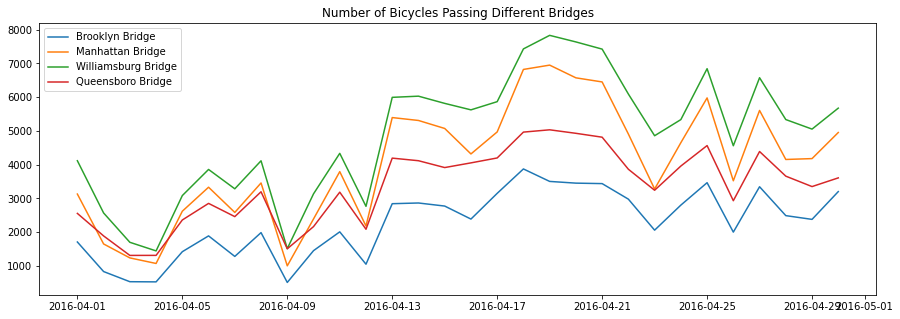

In [22]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(nyc['Date'], nyc['Brooklyn Bridge'], label='Brooklyn Bridge')
ax.plot(nyc['Date'], nyc['Manhattan Bridge'], label='Manhattan Bridge')
ax.plot(nyc['Date'], nyc['Williamsburg Bridge'], label='Williamsburg Bridge')
ax.plot(nyc['Date'], nyc['Queensboro Bridge'], label='Queensboro Bridge')
#ax.plot(nyc['Date'], nyc['Total'], label='Total')
ax.legend(loc=2)
ax.set_title('Number of Bicycles Passing Different Bridges')

It is difficult to find the relationship between bridges using numbers, because the change of the number is too small relative to the size of the number itself.     
Calculate the proportion of bicycles passing through each bridge.

In [11]:
nyc_ratio = nyc.copy()
nyc_ratio['Brooklyn Bridge'] = nyc_ratio['Brooklyn Bridge'] / nyc_ratio['Total']
nyc_ratio['Manhattan Bridge'] = nyc_ratio['Manhattan Bridge'] / nyc_ratio['Total']
nyc_ratio['Williamsburg Bridge'] = nyc_ratio['Williamsburg Bridge'] / nyc_ratio['Total']
nyc_ratio['Queensboro Bridge'] = nyc_ratio['Queensboro Bridge'] / nyc_ratio['Total']

Text(0.5, 1.0, 'Proportion of bicycles passing different bridges')

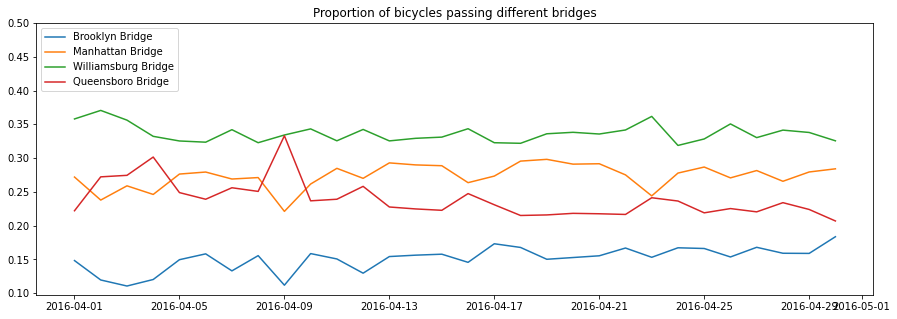

In [12]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(nyc_ratio['Date'], nyc_ratio['Brooklyn Bridge'], label='Brooklyn Bridge')
ax.plot(nyc_ratio['Date'], nyc_ratio['Manhattan Bridge'], label='Manhattan Bridge')
ax.plot(nyc_ratio['Date'], nyc_ratio['Williamsburg Bridge'], label='Williamsburg Bridge')
ax.plot(nyc_ratio['Date'], nyc_ratio['Queensboro Bridge'], label='Queensboro Bridge')
#ax.plot(nyc['Date'], nyc['Total'], label='Total')
plt.ylim(ymax = 0.5)
ax.legend(loc=2)
ax.set_title('Proportion of bicycles passing different bridges')

It can be seen that there is a negative relationship between some bridges.

Text(0.5, 1.0, 'Weather Change')

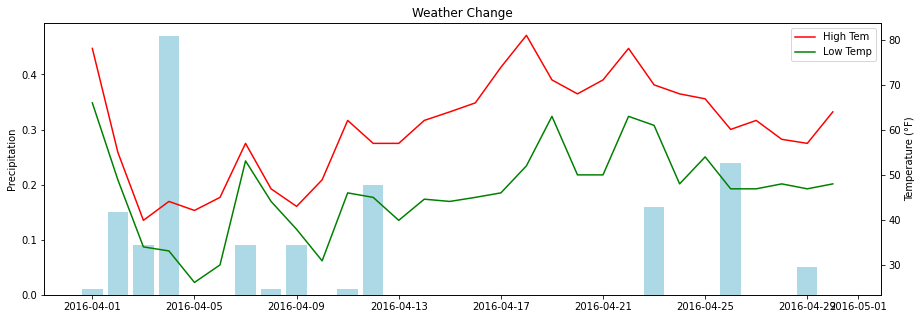

In [13]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot()
ax.bar(nyc_ratio['Date'], nyc_ratio['Precipitation'], label='Precipitation', color='lightblue')
ax2 = ax.twinx()
ax2.plot(nyc_ratio['Date'], nyc_ratio['High Temp (°F)'], label='High Tem', color='red')
ax2.plot(nyc_ratio['Date'], nyc_ratio['Low Temp (°F)'], label='Low Temp', color='green')
ax2.legend(loc=1)
ax.set_ylabel('Precipitation')
ax2.set_ylabel('Temperature (°F)')
ax.set_title('Weather Change')

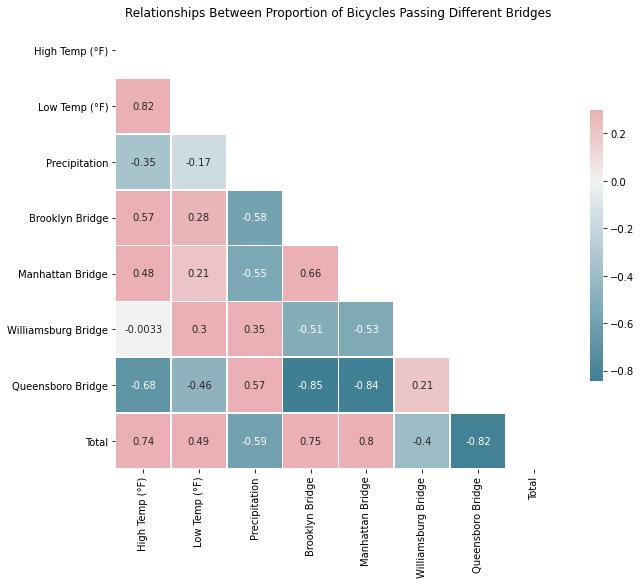

In [19]:
mask = np.zeros_like(nyc_ratio.iloc[:,1:9].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f,ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(nyc_ratio.iloc[:,1:9].corr(), annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Relationships Between Proportion of Bicycles Passing Different Bridges')
plt.show()

**Relationships Between Bridges**     
Queensboro Bridge has strong negative relationships with Brooklyn Bridge and Manhattan Bridge.      
Manhattan Bridge has positive relationship with Brooklyn Bridge.      
Williamsburg Bridge has a relatively small relationship with other bridges, and is also the one with the largest proportion of bicycles and the least fluctuation. 

**Relationships Between Bridges and Weather**       
Queensboro Bridge has negative relationship with temperature.  
Both Brooklyn Bridge and Manhattan Bridge has negative relationship with precipitation.  


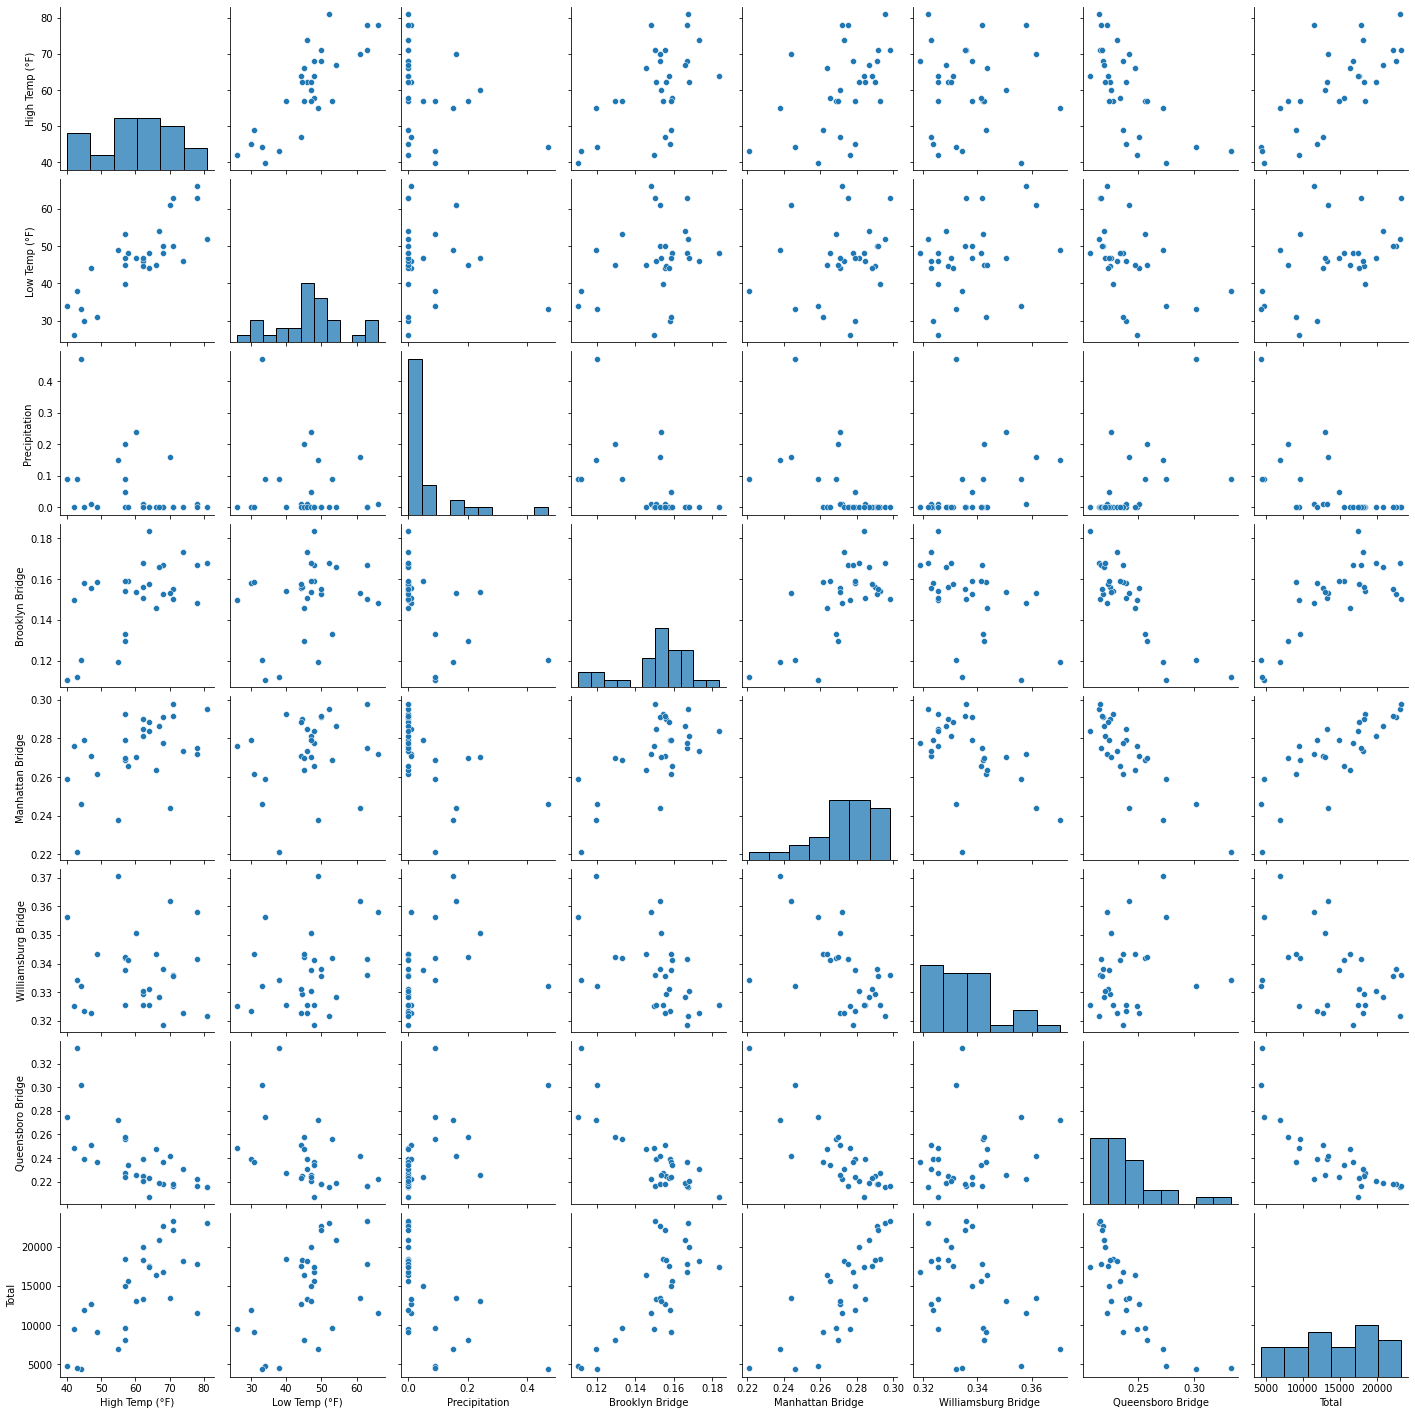

In [18]:
sns.pairplot(nyc_ratio.iloc[:,1:9])

In addition to the relationship between the bridge and the bridge, it can also be seen that as the total number of bicycles increases, the proportion of bicycles passing Williamsburg and Queensboro Bridge decreases.

In [40]:
from sklearn.linear_model import LinearRegression

# Because high temp and low temp is strongly related, only choose one of them
X = nyc_ratio[['High Temp (°F)', 'Precipitation']]
y = nyc_ratio['Brooklyn Bridge']
lm = LinearRegression().fit(X, y)
B = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['Features', 'Brooklyn Bridge'])

y = nyc_ratio['Manhattan Bridge']
lm = LinearRegression().fit(X, y)
M = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['Features', 'Manhattan Bridge'])

y = nyc_ratio['Williamsburg Bridge']
lm = LinearRegression().fit(X, y)
W = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['Features', 'Williamsburg Bridge'])

y = nyc_ratio['Queensboro Bridge']
lm = LinearRegression().fit(X, y)
Q = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['Features', 'Queensboro Bridge'])

y = nyc_ratio['Total']
lm = LinearRegression().fit(X, y)
T = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['Features', 'Total'])

weather_brige = B.merge(M).merge(W).merge(Q).merge(T)
weather_brige

,Features,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,High Temp (°F),0.000657,0.000511,0.000154,-0.001323,304.836289
1,Precipitation,-0.075049,-0.076877,0.049962,0.101964,-20682.118931


In the linear regression, when the temperature becomes higher or precipitation decreases, the total number of bicycles increases.

The change trend of Brooklyn Bridge and Manhattan Bridge is as same as the overall trend while Queensboro Bridge is opposite.

Williamsburg Bridge have both positive relationships with temperature and precipitation, but the coefficients are relatively small.